In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from gensim.models import Word2Vec
import spacy
import nltk

1. Підготовка середовища

In [2]:
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


2. Завантаження даних

In [4]:
data = pd.read_csv("train.csv")
print(data.head())
print("Columns:", data.columns)

                                                 sms  label
0  Go until jurong point, crazy.. Available only ...      0
1                    Ok lar... Joking wif u oni...\n      0
2  Free entry in 2 a wkly comp to win FA Cup fina...      1
3  U dun say so early hor... U c already then say...      0
4  Nah I don't think he goes to usf, he lives aro...      0
Columns: Index(['sms', 'label'], dtype='object')


Передобробка тексту

In [17]:
# Очистка тексту
if 'text' in data.columns:
    text_column = 'text'
elif 'sms' in data.columns:
    text_column = 'sms'
else:
    raise KeyError("No column with text data found. Ensure your dataset contains a 'text' or 'sms' column.")

data['cleaned_text'] = data[text_column].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

In [ ]:
# Видалення стоп-слів
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

In [18]:
# Лемматизація
data['lemmatized_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)

4. Векторизація тексту

In [10]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['lemmatized_text'])

# Word2Vec (за бажанням)
tokens = data['lemmatized_text'].apply(lambda x: x.split())
w2v_model = Word2Vec(sentences=tokens, vector_size=100, window=5, min_count=1)

5. Розбиття даних

In [11]:
if 'label' in data.columns:
    label_column = 'label'
elif 'sentiment' in data.columns:
    label_column = 'sentiment'
else:
    raise KeyError("No column with labels found. Ensure your dataset contains a 'label' or 'sentiment' column.")

X_train, X_test, y_train, y_test = train_test_split(X, data[label_column], test_size=0.2, random_state=42)


6. Навчання моделі

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Оцінка моделі
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9721973094170404


7. Візуалізація результатів

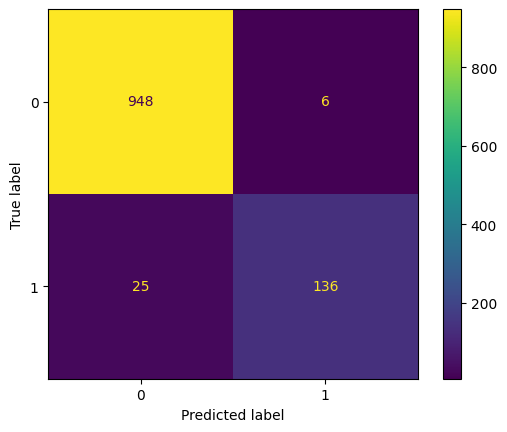

In [14]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Приклади передбачень
for i in range(5):
    print(f"Text: {data[text_column].iloc[i]}")
    print(f"Predicted label: {y_pred[i]}")

Text: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Predicted label: 0
Text: Ok lar... Joking wif u oni...

Predicted label: 0
Text: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

Predicted label: 0
Text: U dun say so early hor... U c already then say...

Predicted label: 0
Text: Nah I don't think he goes to usf, he lives around here though

Predicted label: 0
